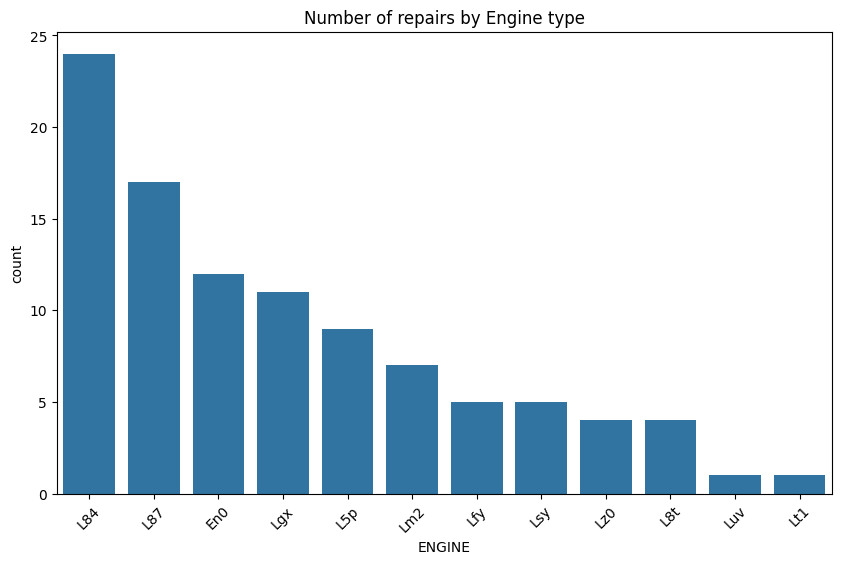

<ipython-input-1-250d5cbc2ebc>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_complaints.values, y=top_complaints.index, palette= 'viridis')


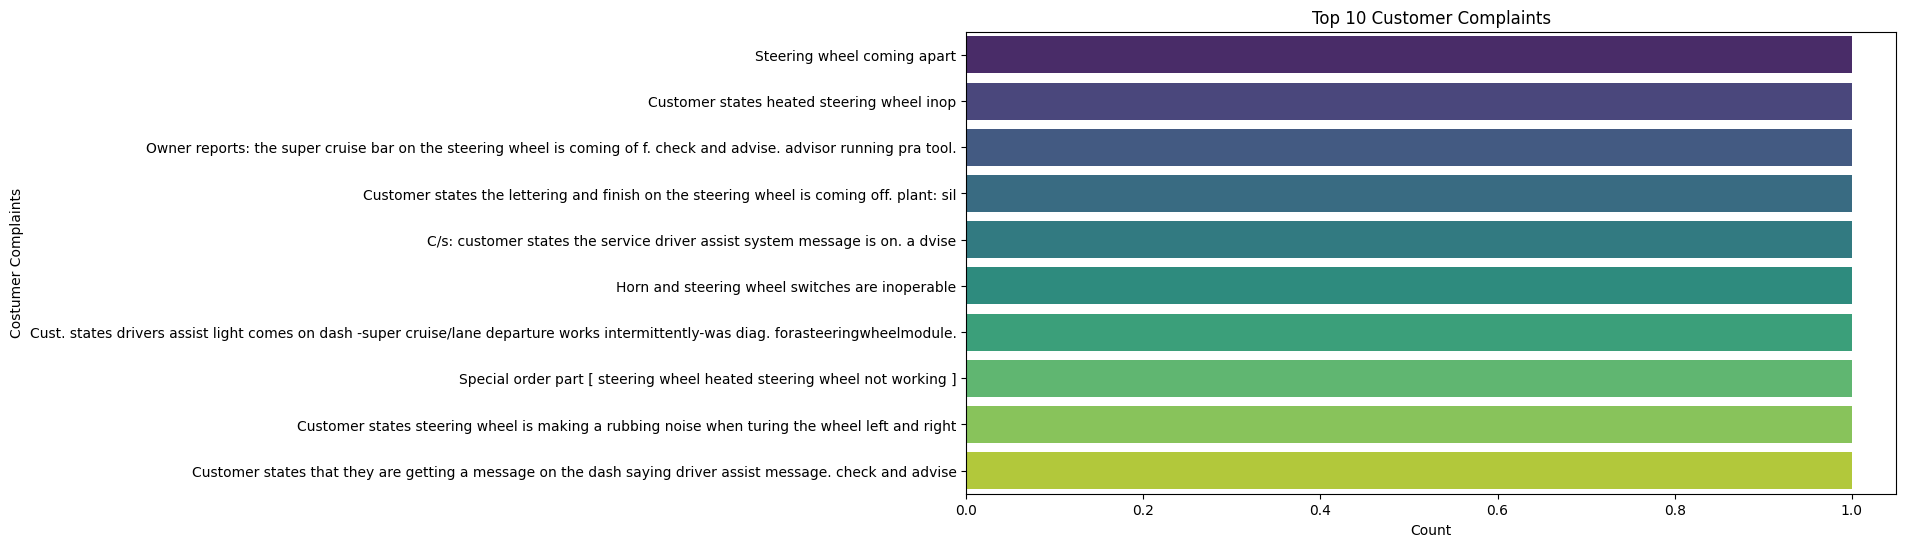

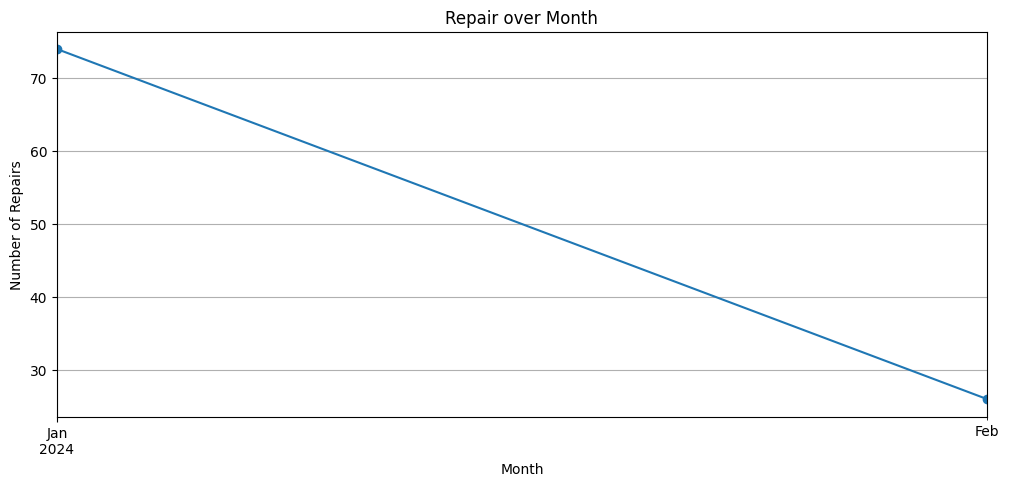

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel(r"C:\Users\RIGVED UMESH\OneDrive\Desktop\AxionRay_Assignment_Hridya\Data\task2_cleaned.xlsx")
# print(df.head())


# Baesd on the datase, the top 5 critical columns here are 
#           1. CUSTOMER_VERBATIM (shows what the customer is reporting and identifies recurring issues)
#           2. ENGINE (helps to analyse reliability of engine type)
#           3. REPAIR_DATE (tracks the date of repair which is essential for trend analysis over time)
#           4. CAUSe_PART_NM (reveals which part of the vehicle fails frequenty)
#           5. TOTAL_COST (measure the financial imapct of the repair)


plt.figure(figsize=(10,6))
sns.countplot(data=df, x= 'ENGINE', order= df['ENGINE'].value_counts().index)
plt.title('Number of repairs by Engine type')
plt.xticks(rotation=45)
plt.show()

top_complaints = df['CUSTOMER_VERBATIM'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_complaints.values, y=top_complaints.index, palette= 'viridis')
plt.title('Top 10 Customer Complaints')
plt.xlabel('Count')
plt.ylabel('Costumer Complaints')
plt.show()

df['REPAIR_DATE'] = pd.to_datetime(df['REPAIR_DATE'])
repairs_per_month = df.groupby(df['REPAIR_DATE'].dt.to_period('M')).size()
repairs_per_month.plot(kind='line', figsize=(12,5), marker='o')
plt.title('Repair over Month')
plt.xlabel('Month')
plt.ylabel('Number of Repairs')
plt.grid(True)
plt.show()